In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Loading the csv data to a Pandas Dataframe 
heart_data = pd.read_csv('heart_cleveland.csv')

# print first 5 rows of the dataset
heart_data.head()

# print last 5 rows of the dataset
heart_data.tail()

# The number of rows and columns in the dataset 
heart_data.shape

# Getting some info about the data 
heart_data.info()

# Checking for missing values
heart_data.isnull().sum()

# statistical measures about the data 
heart_data.describe()

# Checking the distribution of target variable (target values)
# (1) ---------> Defective heart 
# (0) ---------> Healthy heart
heart_data['target'].value_counts()

# Splitting the features and target values 
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']
print(x)
print(y)

# splitting the data into training data and testing data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

# XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# training the XGBoost model with the training data
model.fit(x_train, y_train)

# accuracy on training data 
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
print("Accuracy on Training data : ", training_data_accuracy)

# accuracy on testing data 
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print("Accuracy on Testing data : ", test_data_accuracy)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   0       145   233    1        2      150      0      2.3   
1     67    1   3       160   286    0        2      108      1    

C:\Users\SATISH KUMAR\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [22:49:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
heart_data = pd.read_csv('heart_cleveland.csv')

# Features and target
x = heart_data.drop(columns='target', axis=1)
y = heart_data['target']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(x_train, y_train)

# Function for user input and prediction
def get_user_input():
    # User input for each feature
    age = int(input("Age: "))
    sex = int(input("Sex (1 = male; 0 = female): "))
    cp = int(input("Chest pain type (0-3): "))
    trestbps = int(input("Resting blood pressure (in mm Hg): "))
    chol = int(input("Serum cholesterol in mg/dl: "))
    fbs = int(input("Fasting blood sugar > 120 mg/dl (1 = true; 0 = false): "))
    restecg = int(input("Resting electrocardiographic results (0-2): "))
    thalach = int(input("Maximum heart rate achieved: "))
    exang = int(input("Exercise induced angina (1 = yes; 0 = no): "))
    oldpeak = float(input("ST depression induced by exercise relative to rest: "))
    slope = int(input("Slope of the peak exercise ST segment (0-2): "))
    ca = int(input("Number of major vessels (0-3) colored by fluoroscopy: "))
    thal = int(input("Thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect): "))

    # Convert input to numpy array
    input_data = (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
    input_data_as_numpy_array = np.asarray(input_data)

    # Reshape for single prediction
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Prediction
    prediction = model.predict(input_data_reshaped)

    print("Prediction:", prediction)

    if prediction[0] == 0:
        print("The person does NOT have Heart Disease")
    else:
        print("The person HAS Heart Disease")

# Run the function
get_user_input()


C:\Users\SATISH KUMAR\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [23:05:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Prediction: [0]
The person does NOT have Heart Disease


C:\Users\SATISH KUMAR\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [23:10:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 1.0
Testing Accuracy: 0.7878787878787878
Enter the following feature values (press Enter after each):


C:\Users\SATISH KUMAR\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction Result:
✅ The person is likely HEALTHY.
Probability → Healthy: 0.514, Heart Disease: 0.486


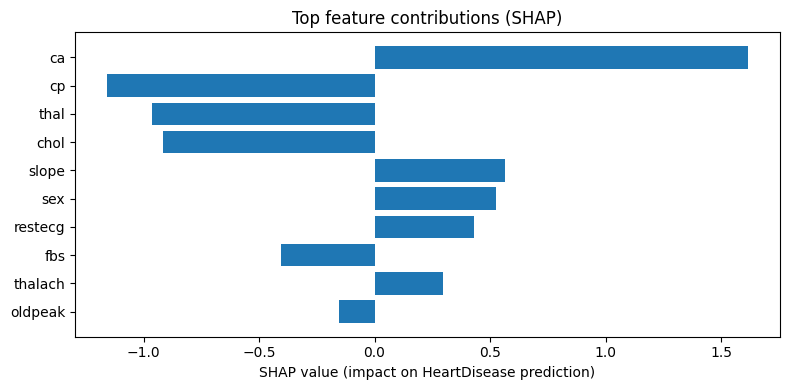

C:\Users\SATISH KUMAR\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



LIME explanation (feature, weight toward predicted classes):
cp <= 2.00: -0.2722
0.00 < ca <= 1.00: 0.2593
0.00 < sex <= 1.00: 0.2246
thal <= 1.00: -0.2058
chol <= 213.50: -0.1273
0.00 < slope <= 1.00: 0.0873
0.00 < restecg <= 1.00: 0.0630
thalach <= 136.00: 0.0618
trestbps <= 120.00: -0.0498
0.80 < oldpeak <= 1.60: 0.0310


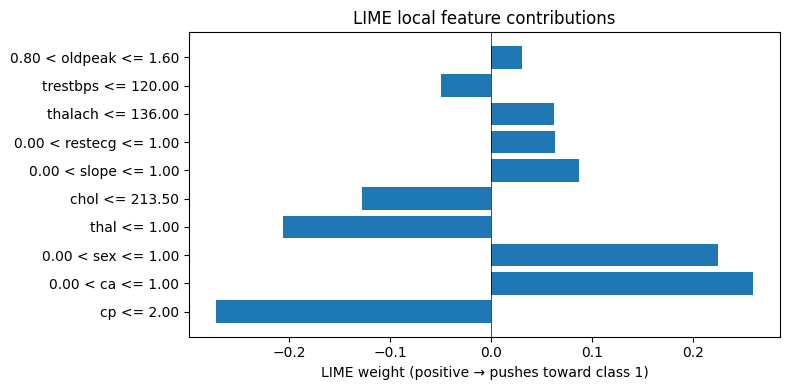


Saved detailed LIME explanation to: /mnt/data/lime_explanation_xgb.html


In [3]:
import numpy as np
import pandas as pd
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# -------------------------
# Load dataset
# -------------------------
heart_data = pd.read_csv('heart_cleveland.csv')

# Features and target
feature_names = heart_data.drop(columns='target', axis=1).columns.tolist()
X = heart_data[feature_names]
y = heart_data['target']

# -------------------------
# Apply SMOTE
# -------------------------
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled_raw = pd.DataFrame(X_resampled, columns=feature_names)

# -------------------------
# Scaling
# -------------------------
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled_raw)

# Train-test split
X_train_scaled, X_test_scaled, y_train, y_test, X_train_raw, X_test_raw = train_test_split(
    X_resampled_scaled,
    y_resampled,
    X_resampled_raw.values,
    test_size=0.2,
    stratify=y_resampled,
    random_state=2
)

# -------------------------
# Train XGBoost Model
# -------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_scaled, y_train)

print("Training Accuracy:", accuracy_score(y_train, xgb_model.predict(X_train_scaled)))
print("Testing Accuracy:", accuracy_score(y_test, xgb_model.predict(X_test_scaled)))

# -------------------------
# SHAP and LIME explainers
# -------------------------
shap_explainer = shap.TreeExplainer(xgb_model)

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_raw,
    feature_names=feature_names,
    class_names=['Healthy', 'HeartDisease'],
    discretize_continuous=True,
    random_state=42
)

def predict_proba_from_raw(X_raw):
    X_scaled = scaler.transform(X_raw)
    return xgb_model.predict_proba(X_scaled)

# -------------------------
# Interactive input + explanations
# -------------------------
def get_user_input_and_explain():
    user_values = []
    print("Enter the following feature values (press Enter after each):")
    for feat in feature_names:
        while True:
            try:
                val = float(input(f"{feat}: ").strip())
                user_values.append(val)
                break
            except ValueError:
                print("Invalid input — please enter a numeric value.")

    user_raw = np.array(user_values).reshape(1, -1)
    user_scaled = scaler.transform(user_raw)

    # Prediction
    pred = xgb_model.predict(user_scaled)[0]
    pred_proba = xgb_model.predict_proba(user_scaled)[0]
    print("\nPrediction Result:")
    if pred == 1:
        print("⚠️ The person is likely to have HEART DISEASE.")
    else:
        print("✅ The person is likely HEALTHY.")
    print(f"Probability → Healthy: {pred_proba[0]:.3f}, Heart Disease: {pred_proba[1]:.3f}")

    # ---- SHAP explanation ----
    shap_values = shap_explainer.shap_values(user_scaled)

    plt.figure(figsize=(8, 4))
    shap_abs = np.abs(shap_values).flatten()
    order = np.argsort(shap_abs)[::-1]
    topN = min(len(feature_names), 10)
    top_idx = order[:topN]
    top_feats = [feature_names[i] for i in top_idx]
    top_vals = shap_values.flatten()[top_idx]
    plt.barh(range(len(top_feats))[::-1], top_vals, align='center')
    plt.yticks(range(len(top_feats))[::-1], top_feats)
    plt.xlabel("SHAP value (impact on HeartDisease prediction)")
    plt.title("Top feature contributions (SHAP)")
    plt.tight_layout()
    plt.show()

    # ---- LIME explanation ----
    exp = lime_explainer.explain_instance(
        user_raw.flatten(),
        predict_proba_from_raw,
        num_features=min(10, len(feature_names))
    )
    lime_list = exp.as_list()
    print("\nLIME explanation (feature, weight toward predicted classes):")
    for feat, weight in lime_list:
        print(f"{feat}: {weight:.4f}")

    feats = [f for f, w in lime_list]
    weights = [w for f, w in lime_list]
    plt.figure(figsize=(8, 4))
    y_pos = np.arange(len(feats))
    plt.barh(y_pos, weights, align='center')
    plt.yticks(y_pos, feats)
    plt.xlabel("LIME weight (positive → pushes toward class 1)")
    plt.title("LIME local feature contributions")
    plt.axvline(0, color='k', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    try:
        html_path = "/mnt/data/lime_explanation_xgb.html"
        exp.save_to_file(html_path)
        print(f"\nSaved detailed LIME explanation to: {html_path}")
    except Exception:
        pass

# Run
if __name__ == "__main__":
    get_user_input_and_explain()
